In [1]:
import cv2
import os

In [2]:
from PIL import Image

# File Name Cutting & Size Unification

fileList = os.listdir('./realData/')
count = 1
for file in fileList:
    fileNumber = file.split('-')[1]
    img = Image.open('./realData/' + file)
    img_resize = img.resize((256, 256))
    if(file.split('-')[2] == '001.jpg') or (file.split('-')[2] == '01.jpg'):
        count = 1
    img_resize.save('./ImageSizeUnificated256/resized.' + fileNumber + '(' + str(count) + ').png')
    count += 1

# -------------------------------------------------------------------------------------------------------

# Image Gray Scaler

fileList = os.listdir('./ImageSizeUnificated256/')

for file in fileList:
    fileNumber = file.split('.')[1]
    imageName = './ImageSizeUnificated256/resized.' + fileNumber + '.png'
    image = cv2.imread(imageName, cv2.IMREAD_COLOR)
    if image is None:
        print('Could not open or find the Image')
    grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("./grayImages256/" + fileNumber + '.png', grayImage)

# -------------------------------------------------------------------------------------------------------

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [5]:
filenames = os.listdir("./grayImages256/")
categories = []
for filename in filenames:
    category = filename.split('.')[0][:4]
    categories.append(category)
        
df = pd.DataFrame({
    'filename' : filenames,
    'category' : categories
})

In [6]:
df.sort_values(by='category', ascending=True)

,filename,category
0,3001(1).png,3001
1,3001(2).png,3001
2,3001(3).png,3001
3,3001(4).png,3001
4,3001(5).png,3001
...,...,...
2111,6022(2).png,6022
2110,6022(10).png,6022
2109,6022(1).png,6022
2112,6022(3).png,6022


3055(8).png


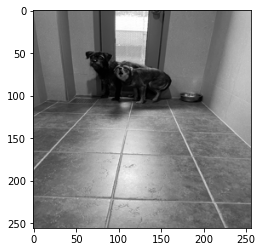

In [7]:
sample = random.choice(filenames)
print(sample)
image = load_img("./grayImages256/"+sample)
plt.imshow(image)

# Data Augmentation

num_argumented_images = 1000

file_path = './grayImages/'
file_names = os.listdir(file_path)
total_origin_image_num = len(file_names)

for k in range(0, 10):
    argument_cnt = 1
    for i in range(0, num_argumented_images):
        file_name = file_names[k]

        origin_image_path = './grayImages/' + file_name
        image = Image.open(origin_image_path)
        random_argument = random.randrange(1, 4)

        # 좌우 반전
        if(random_argument == 1):
            inverted_image = image.transpose(Image.FLIP_LEFT_RIGHT)

            inverted_image.save('./testData/'+ str(k+1) + '(' + str(argument_cnt) + ').png')

        # 기울이기
        elif(random_argument == 2):
            rotated_image = image.rotate(random.randrange(-20, 20))

            rotated_image.save('./testData/' + str(k+1) + '(' + str(argument_cnt) + ').png')

        # 노이즈 추가
        elif(random_argument == 3):
            img = cv2.imread(origin_image_path)
            row, col, ch = img.shape
            mean = 0
            var = 0.1
            sigma = var ** 0.5
            gauss = np.random.normal(mean, sigma, (row, col, ch))
            gauss = gauss.reshape(row, col, ch)
            noisy_array = img + gauss
            noisy_image = Image.fromarray(np.uint8(noisy_array)).convert('RGB')

            noisy_image.save('./testData/' + str(k+1) + '(' + str(argument_cnt) + ').png')
        
        argument_cnt += 1

# -------------------------------------------------------------------------------------------------------

# Data Labeling
## -------------------------------------------------------
## train target data

In [8]:
train_target = np.array(df['category'])

In [9]:
train_target

array(['3001', '3001', '3001', ..., '6022', '6022', '6022'], dtype=object)

In [10]:
# train_target = train_target.astype('uint8')

In [11]:
train_target

array(['3001', '3001', '3001', ..., '6022', '6022', '6022'], dtype=object)

In [12]:
print('dtype : ' ,train_target.dtype)
print('type : ', type(train_target))
print('shape : ', train_target.shape)
print('unique : ', np.unique(train_target, return_counts=True))

dtype :  object
type :  <class 'numpy.ndarray'>
shape :  (2119,)
unique :  (array(['3001', '3002', '3003', '3004', '3005', '3006', '3008', '3009',
       '3010', '3011', '3012', '3013', '3014', '3015', '3016', '3017',
       '3018', '3019', '3020', '3021', '3022', '3023', '3024', '3025',
       '3027', '3028', '3029', '3030', '3031', '3032', '3033', '3034',
       '3035', '3036', '3037', '3038', '3039', '3040', '3041', '3042',
       '3043', '3044', '3045', '3046', '3047', '3048', '3049', '3050',
       '3051', '3052', '3053', '3054', '3055', '3056', '3057', '3058',
       '3059', '3060', '3061', '3062', '3063', '3064', '3065', '3066',
       '3067', '3068', '3069', '3070', '3071', '3072', '3073', '3074',
       '3075', '3076', '3077', '3078', '3079', '3080', '3081', '3082',
       '3083', '4000', '4001', '4002', '4004', '4005', '4006', '4007',
       '4008', '4009', '4010', '4011', '4012', '4013', '4014', '4015',
       '4016', '4017', '4018', '4019', '4020', '4021', '4022', '4024',
 

# -------------------------------------------------------------------------------------------------------

# 1개 짜리 데이터 삭제
## 삭제 대상

deleteTarget = []

targetNumber = (np.unique(train_target, return_counts=True))[0]
countes = (np.unique(train_target, return_counts=True))[1]

for i in range(0, len(countes)):
    if countes[i] == 1:
        deleteTarget.append(targetNumber[i])

print(deleteTarget)

## 삭제

for i in range(0, len(countes)):
    if countes[i] == 1:
        if os.path.isfile('./grayImages256/' + targetNumber[i] + '(1).png'):
            os.remove('./grayImages256/' + targetNumber[i] + '(1).png')


# -------------------------------------------------------------------------------------------------------

# train input data

In [13]:
train_input = []

In [14]:
filenames = os.listdir("./grayImages256/")
for filename in filenames:
#     plt.imshow(np.array(Image.open('./trainData/' + filename)))
    train_input.append( np.array(Image.open('./grayImages256/' + filename)) )

In [15]:
train_input = np.array(train_input)

In [16]:
train_input

array([[[ 58,  56,  59, ...,  68,  71,  70],
        [ 58,  58,  59, ...,  70,  72,  73],
        [ 57,  59,  60, ...,  71,  72,  73],
        ...,
        [199, 204, 206, ...,  86,  83,  84],
        [150, 155, 166, ...,  86,  86,  83],
        [215, 203, 188, ...,  86,  86,  87]],

       [[ 58,  56,  59, ...,  68,  71,  70],
        [ 58,  58,  59, ...,  70,  72,  73],
        [ 57,  59,  60, ...,  71,  72,  73],
        ...,
        [199, 204, 206, ...,  86,  83,  84],
        [150, 155, 166, ...,  86,  86,  83],
        [215, 203, 188, ...,  86,  86,  87]],

       [[ 54,  53,  53, ...,  68,  70,  72],
        [ 54,  53,  52, ...,  71,  71,  72],
        [ 54,  53,  53, ...,  72,  72,  73],
        ...,
        [ 99,  99, 100, ..., 120, 124, 126],
        [ 97,  96,  97, ..., 118, 118, 118],
        [109, 102, 101, ..., 114, 115, 111]],

       ...,

       [[ 90,  90,  92, ...,  93,  94,  97],
        [ 85,  92,  77, ...,  94,  94,  97],
        [ 60,  50,  40, ...,  95,  94,  97

In [17]:
print(train_input.shape)

(2119, 256, 256)


# -------------------------------------------------------------------------------------------------------

# Data Normalization

# ********************************

In [18]:
train_scaled = train_input.reshape(-1, 256, 256, 1) / 255.0

In [19]:
print(train_scaled.shape)

(2119, 256, 256, 1)


# CV

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier # 확률적 경사 하강법
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print('성능 : {:.2f}%'.format(np.mean(scores['test_score']*100)))

# Data Split

In [20]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [21]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(1695, 256, 256, 1) (1695,)
(424, 256, 256, 1) (424,)


# -------------------------------------------------------------------------------------------------------

# Learn

import tensorflow as tf
from tensorflow import keras

dense = keras.layers.Dense(units=1, activation='softmax', input_shape=(784,))

model = keras.Sequential(dense)

model.compile(loss='categoraical_crossentropy', metrics='accuracy')

print(train_scaled.shape)
print(train_target.shape)

model.fit(train_scaled, train_target, epochs=10)

# Performance

model.evaluate(val_scaled, val_target)

# CNN

In [22]:
from tensorflow import keras

In [23]:
model_CNN = keras.Sequential()

# ************ breakpoint ************

In [24]:
model_CNN.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

In [25]:
model_CNN.add(keras.layers.MaxPooling2D(2))

In [26]:
model_CNN.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))

In [27]:
model_CNN.add(keras.layers.MaxPooling2D(2))

In [28]:
model_CNN.add(keras.layers.Flatten())
model_CNN.add(keras.layers.Dense(100, activation='relu'))
model_CNN.add(keras.layers.Dropout(0.4))
model_CNN.add(keras.layers.Dense(10, activation='softmax'))

# ************ breakpoint ************

In [29]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [30]:
model_CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model_CNN.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))
# , callbacks=[checkpoint_cb, early_stopping_cb]

Epoch 1/20


ValueError: in user code:

    File "C:\Users\roakf\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\roakf\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\roakf\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\roakf\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\roakf\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\roakf\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 256, 256, 1)
